<a href="https://colab.research.google.com/github/PriyankaAmrute/DAVExps/blob/main/DAVEXP7_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## **Aim :**
  To perform the steps involved in Text Analytics in Python & R.

## **Task to be performed :**
1. Explore Top-5 Text Analytics Libraries in Python (w.r.t Features Applications)
2. Explore Top-5 Text Analytics Libraries in R (w.r.t Features & Applications)
3. Perform the following experiments using Python & R
* Tokenization (Sentence & Word)
* Frequency Distribution
* Remove stopwords & punctuations
* Lexicon Normalization (Stemming, Lemmatization)
* Part of Speech tagging
* Named Entity Recognization
* Scrape data from a website










# **Text Analytics in Python**

In [ ]:
pip install beautifulsoup4

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: pip install
        ^


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import requests
from bs4 import BeautifulSoup

## Tokenization(sentence and word)

In [ ]:
text = "Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Sentence tokenization, also known as sentence segmentation, is the process of splitting a text into individual sentences based on some predetermined rules."
sentences = sent_tokenize(text)
words = word_tokenize(text)

In [ ]:
sentences

['Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.',
 'Sentence tokenization, also known as sentence segmentation, is the process of splitting a text into individual sentences based on some predetermined rules.']

In [ ]:
print(words)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.', 'Sentence', 'tokenization', ',', 'also', 'known', 'as', 'sentence', 'segmentation', ',', 'is', 'the', 'process', 'of', 'splitting', 'a', 'text', 'into', 'individual', 'sentences', 'based', 'on', 'some', 'predetermined', 'rules', '.']


## Frequency Distribution

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Compute frequency distribution
fdist = FreqDist(words)
print("Frequency Distribution:")
print(fdist.most_common(10))  # Display the 10 most common words

Frequency Distribution:
[(',', 6), ('of', 3), ('and', 3), ('language', 2), ('(', 2), (')', 2), ('is', 2), ('a', 2), ('the', 2), ('computers', 2)]


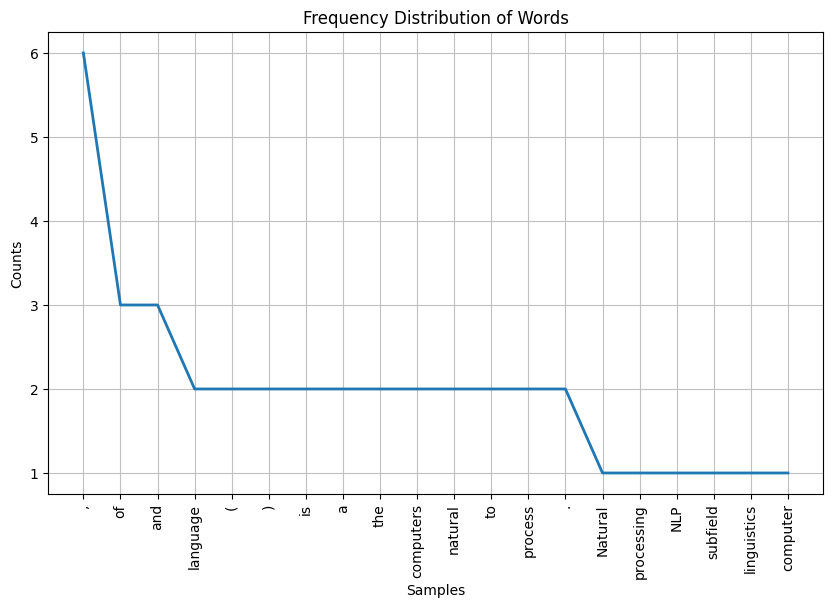

In [ ]:
# Plot frequency distribution graph
plt.figure(figsize=(10, 6))
fdist.plot(20, title='Frequency Distribution of Words')
plt.show()

## Remove stopwords & punctuations

In [ ]:
import string

In [ ]:
#Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

In [ ]:
# Join the filtered words back into a sentence
filtered_sentence = ' '.join(filtered_words)

In [ ]:
print(filtered_sentence)

Natural language processing NLP subfield linguistics computer science information engineering artificial intelligence concerned interactions computers human natural languages particular program computers process analyze large amounts natural language data Sentence tokenization also known sentence segmentation process splitting text individual sentences based predetermined rules


## Lexicon Normalization (Stemming, Lemmatization)

In [ ]:
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in filtered_words]

In [ ]:
print(stemmed_words)

['natur', 'languag', 'process', 'nlp', 'subfield', 'linguist', 'comput', 'scienc', 'inform', 'engin', 'artifici', 'intellig', 'concern', 'interact', 'comput', 'human', 'natur', 'languag', 'particular', 'program', 'comput', 'process', 'analyz', 'larg', 'amount', 'natur', 'languag', 'data', 'sentenc', 'token', 'also', 'known', 'sentenc', 'segment', 'process', 'split', 'text', 'individu', 'sentenc', 'base', 'predetermin', 'rule']


In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

In [ ]:
print(lemmatized_words)

['Natural', 'language', 'processing', 'NLP', 'subfield', 'linguistics', 'computer', 'science', 'information', 'engineering', 'artificial', 'intelligence', 'concerned', 'interaction', 'computer', 'human', 'natural', 'language', 'particular', 'program', 'computer', 'process', 'analyze', 'large', 'amount', 'natural', 'language', 'data', 'Sentence', 'tokenization', 'also', 'known', 'sentence', 'segmentation', 'process', 'splitting', 'text', 'individual', 'sentence', 'based', 'predetermined', 'rule']


## Part of Speech tagging

In [ ]:
pos_tags = pos_tag(filtered_words)
print(pos_tags)

[('Natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('NLP', 'NNP'), ('subfield', 'NN'), ('linguistics', 'NNS'), ('computer', 'NN'), ('science', 'NN'), ('information', 'NN'), ('engineering', 'NN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('concerned', 'VBN'), ('interactions', 'NNS'), ('computers', 'NNS'), ('human', 'JJ'), ('natural', 'JJ'), ('languages', 'NNS'), ('particular', 'JJ'), ('program', 'NN'), ('computers', 'NNS'), ('process', 'VBP'), ('analyze', 'JJ'), ('large', 'JJ'), ('amounts', 'NNS'), ('natural', 'JJ'), ('language', 'NN'), ('data', 'NNS'), ('Sentence', 'NNP'), ('tokenization', 'NN'), ('also', 'RB'), ('known', 'VBN'), ('sentence', 'NN'), ('segmentation', 'NN'), ('process', 'NN'), ('splitting', 'VBG'), ('text', 'JJ'), ('individual', 'JJ'), ('sentences', 'NNS'), ('based', 'VBN'), ('predetermined', 'VBD'), ('rules', 'NNS')]


## Named Entity Recognition

In [ ]:
named_entities = ne_chunk(pos_tags)
print(named_entities)

(S
  Natural/JJ
  language/NN
  processing/NN
  (ORGANIZATION NLP/NNP)
  subfield/NN
  linguistics/NNS
  computer/NN
  science/NN
  information/NN
  engineering/NN
  artificial/JJ
  intelligence/NN
  concerned/VBN
  interactions/NNS
  computers/NNS
  human/JJ
  natural/JJ
  languages/NNS
  particular/JJ
  program/NN
  computers/NNS
  process/VBP
  analyze/JJ
  large/JJ
  amounts/NNS
  natural/JJ
  language/NN
  data/NNS
  Sentence/NNP
  tokenization/NN
  also/RB
  known/VBN
  sentence/NN
  segmentation/NN
  process/NN
  splitting/VBG
  text/JJ
  individual/JJ
  sentences/NNS
  based/VBN
  predetermined/VBD
  rules/NNS)


## Scrape data from a website

In [ ]:
url = 'https://www.amazon.in/'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
text_from_website = soup.get_text()

In [ ]:
print(text_from_website)










Amazon.in













Enter the characters you see below
Sorry, we just need to make sure you're not a robot. For best results, please make sure your browser is accepting cookies.










Type the characters you see in this image:









Try different image











Continue shopping











Conditions of Use & Sale




Privacy Notice


          © 1996-2015, Amazon.com, Inc. or its affiliates
          










# **Text Analytics in R**

In [ ]:
install.packages("tm", repos="http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘NLP’, ‘slam’ are not available”
Warning message in install.packages("tm", repos = "http://R-Forge.R-project.org"):
“installation of package ‘tm’ had non-zero exit status”


In [ ]:
library(tidyverse)     # For data manipulation and visualization
library(tm)            # For text mining
library(SnowballC)     # For stemming
library(openNLP)       # For named entity recognition

ERROR: Error in library(tm): there is no package called ‘tm’


## Tokenization(words and sentences)

In [ ]:
install.packages("tokenizers")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tokenizers)

In [ ]:
# Sample text
text <- "Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Sentence tokenization, also known as sentence segmentation, is the process of splitting a text into individual sentences based on some predetermined rules."

In [ ]:
words <- unlist(tokenize_words(text))
print(words)

 [1] "natural"       "language"      "processing"    "nlp"          
 [5] "is"            "a"             "subfield"      "of"           
 [9] "linguistics"   "computer"      "science"       "information"  
[13] "engineering"   "and"           "artificial"    "intelligence" 
[17] "concerned"     "with"          "the"           "interactions" 
[21] "between"       "computers"     "and"           "human"        
[25] "natural"       "languages"     "in"            "particular"   
[29] "how"           "to"            "program"       "computers"    
[33] "to"            "process"       "and"           "analyze"      
[37] "large"         "amounts"       "of"            "natural"      
[41] "language"      "data"          "sentence"      "tokenization" 
[45] "also"          "known"         "as"            "sentence"     
[49] "segmentation"  "is"            "the"           "process"      
[53] "of"            "splitting"     "a"             "text"         
[57] "into"          "individual" 

## Frequency Distribution

In [ ]:
# Compute frequency distribution
word_freq <- table(words)

In [ ]:
# Get the top N common words
top_n <- 10
top_words <- head(sort(word_freq, decreasing = TRUE), n = top_n)

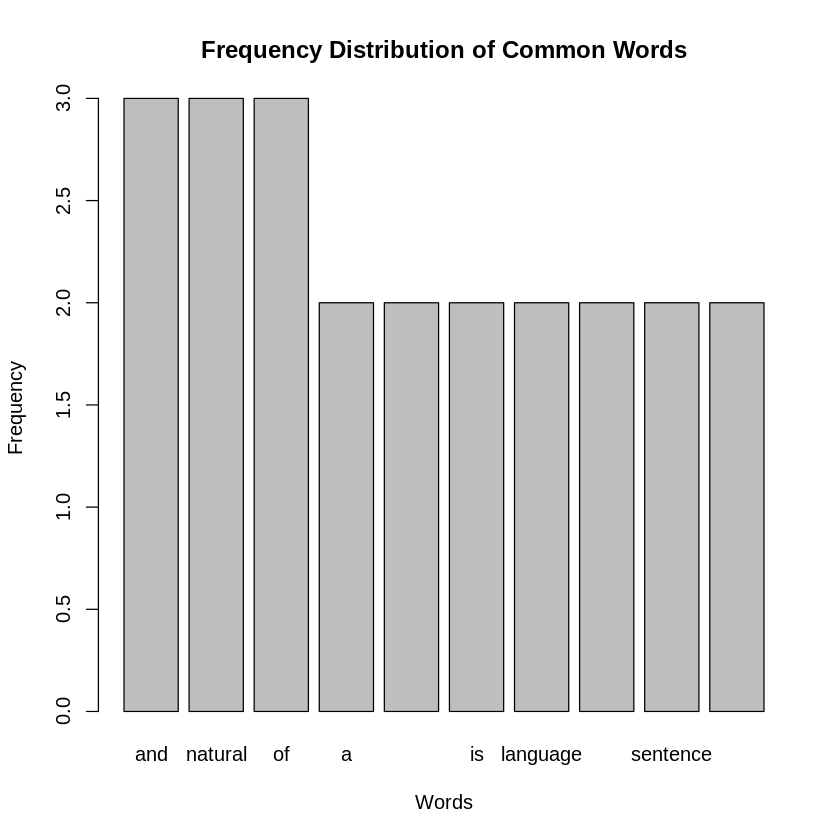

In [ ]:
# Plot frequency distribution of common words
barplot(top_words, main = "Frequency Distribution of Common Words", xlab = "Words", ylab = "Frequency")

## Remove stopwords and punctuation

In [ ]:
# Remove stopwords and punctuation
stop_word <- unlist(tokenize_words(text,lowercase = TRUE,stopwords = ("to"), strip_punct = TRUE, strip_numeric = TRUE, simplify = FALSE))
print(stop_word)

 [1] "natural"       "language"      "processing"    "nlp"          
 [5] "is"            "a"             "subfield"      "of"           
 [9] "linguistics"   "computer"      "science"       "information"  
[13] "engineering"   "and"           "artificial"    "intelligence" 
[17] "concerned"     "with"          "the"           "interactions" 
[21] "between"       "computers"     "and"           "human"        
[25] "natural"       "languages"     "in"            "particular"   
[29] "how"           "program"       "computers"     "process"      
[33] "and"           "analyze"       "large"         "amounts"      
[37] "of"            "natural"       "language"      "data"         
[41] "sentence"      "tokenization"  "also"          "known"        
[45] "as"            "sentence"      "segmentation"  "is"           
[49] "the"           "process"       "of"            "splitting"    
[53] "a"             "text"          "into"          "individual"   
[57] "sentences"     "based"      

## Lexicon Normalization (Stemming, Lemmatization)

In [ ]:
library(SnowballC)

In [ ]:
# Stemming
stemmed_words <- wordStem(words)

In [ ]:
# Display stemmed words
print("Stemmed Words:")
print(stemmed_words)

[1] "Stemmed Words:"
 [1] "natur"       "languag"     "process"     "nlp"         "i"          
 [6] "a"           "subfield"    "of"          "linguist"    "comput"     
[11] "scienc"      "inform"      "engin"       "and"         "artifici"   
[16] "intellig"    "concern"     "with"        "the"         "interact"   
[21] "between"     "comput"      "and"         "human"       "natur"      
[26] "languag"     "in"          "particular"  "how"         "to"         
[31] "program"     "comput"      "to"          "process"     "and"        
[36] "analyz"      "larg"        "amount"      "of"          "natur"      
[41] "languag"     "data"        "sentenc"     "token"       "also"       
[46] "known"       "a"           "sentenc"     "segment"     "i"          
[51] "the"         "process"     "of"          "split"       "a"          
[56] "text"        "into"        "individu"    "sentenc"     "base"       
[61] "on"          "some"        "predetermin" "rule"       
